In [104]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

root_path = Path("../")
data_path = root_path / "data"
figures_path = Path("figures")

In [2]:
def prepare_dataset(dataset: pd.DataFrame) -> pd.DataFrame:
    dataset = dataset[dataset.User_Score != "tbd"]
    dataset["User_Score"] = dataset["User_Score"].astype("float")
    dataset.columns = [col.lower() for col in dataset.columns]
    dataset["year_of_release"] = pd.to_datetime(dataset["year_of_release"], format="%Y")
    return dataset

In [3]:
dataset_path = data_path / "dataset.csv"
df = pd.read_csv(dataset_path)
df = prepare_dataset(df)

/var/folders/jq/byk1x73j6pngqgl6my8tgyhm0000gn/T/ipykernel_75360/4005787621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["User_Score"] = dataset["User_Score"].astype("float")
/var/folders/jq/byk1x73j6pngqgl6my8tgyhm0000gn/T/ipykernel_75360/4005787621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["year_of_release"] = pd.to_datetime(dataset["year_of_release"], format="%Y")


In [4]:
df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dtypes

name                       object
platform                   object
year_of_release    datetime64[ns]
genre                      object
publisher                  object
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
global_sales              float64
critic_score              float64
critic_count              float64
user_score                float64
user_count                float64
developer                  object
rating                     object
dtype: object

# Barplot tutorial

Assume that we want to analyze some descriptive statistics about different game platforms. Here, we have a categorical variable platform, so bar plot is a great choice here.
Let's start with understanding the categories that we have in the dataset and their proportions. When we want to count tha partitions of particular categorical variable in the dataset we can use `countplot` method in `seaborn`

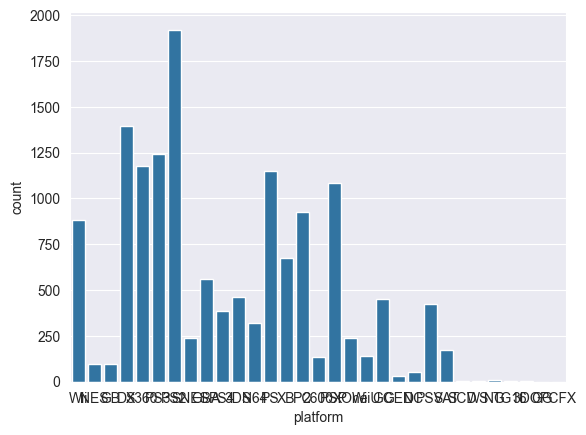

In [105]:
sns.countplot(
    data=df,
    x="platform",
)

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_0.pdf",
    dpi=300,
    bbox_inches="tight",
)

Here we can see that we have many categories in the dataset, so the figure is not understandable due to overlapping of labels in x-axis. We can solve either via reducing the number of groups or just changing the layout of the figure and relocate labels from x-axis to the y.

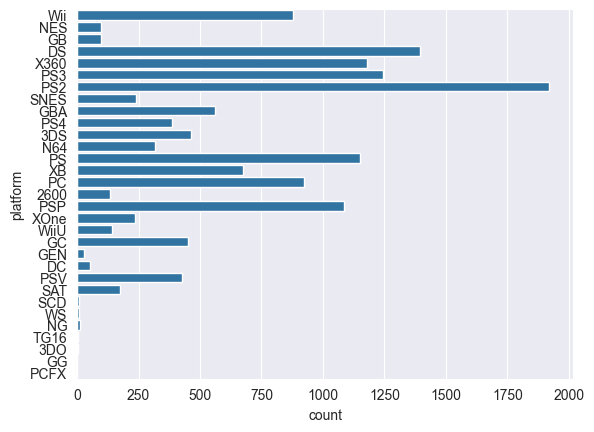

In [106]:
sns.countplot(
    data=df,
    y="platform",
)

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_1.pdf",
    dpi=300,
    bbox_inches="tight",
)

Now it is a little bit better, we can read all the labels, but it is still not convenient for exploration. To understand more easily which platforms are more popular, we can reorder them in the sorted order.

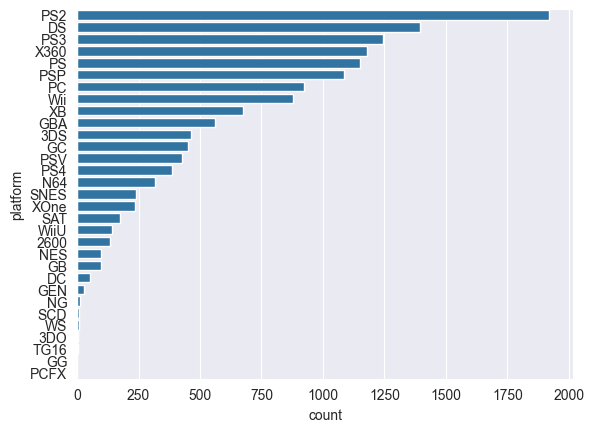

In [107]:
sns.countplot(data=df, y="platform", order=df["platform"].value_counts().index)

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_2.pdf",
    dpi=300,
    bbox_inches="tight",
)

By the way, in the dataset we have very old data, so let's filter the dataset to keep games after 2014 (not more than 10 years old from now) and perform the same analysis one more time.

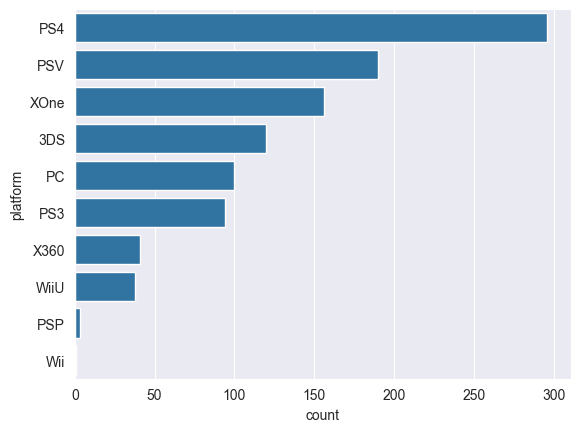

In [108]:
df_updated_by_time = df[df.year_of_release > pd.to_datetime("2014-01-01")]

sns.countplot(data=df_updated_by_time, y="platform", order=df_updated_by_time["platform"].value_counts().index)

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_3.pdf",
    dpi=300,
    bbox_inches="tight",
)

Wow, most of the platforms have disappeared from the list, so we can see which platforms are more popular nearly to nowadays. Let's keep several of them for further analysis.

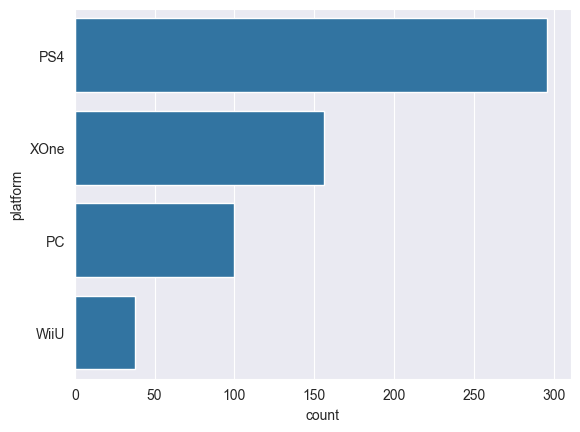

In [109]:
df_selected = df_updated_by_time[df_updated_by_time.platform.isin(["PS4", "XOne", "PC", "WiiU"])]
sns.countplot(data=df_selected, y="platform", order=df_selected["platform"].value_counts().index)

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_4.pdf",
    dpi=300,
    bbox_inches="tight",
)

Here we have not so many classes, and it could be more convenient to represent the same data in the form of Pie chart, because the proportion is more relevant for us rather than the absolute values. Unfortunately, `seaborn` doesn't have a distinct method for creating Pie charts, but Pandas can. 

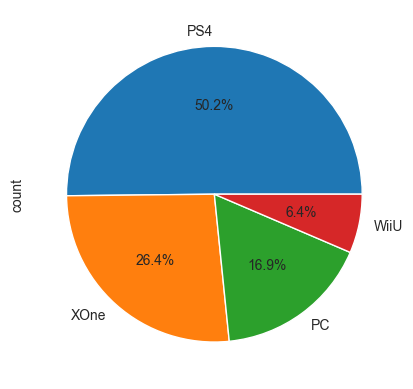

In [110]:
df_selected.platform.value_counts().plot.pie(y="platform", autopct="%1.1f%%")

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_5.pdf",
    dpi=300,
    bbox_inches="tight",
)

By now, we analysed only proportions of the particular categorical variable. With the bar plots we can add another continuous variable into the analysis. For example, let's analyse the global sales for each of the platforms. We can easily conduct it using `batplot` method from `seaborn` 

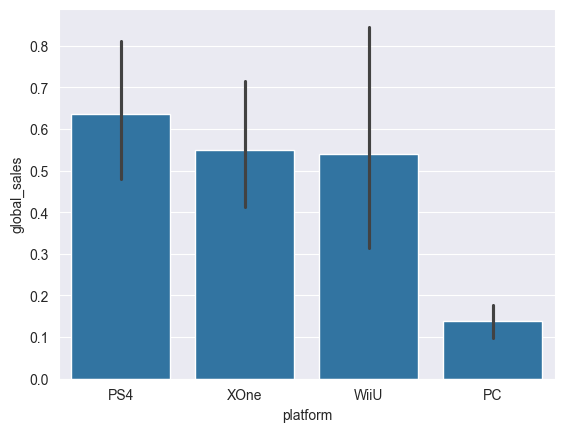

In [111]:
sns.barplot(data=df_selected, x="platform", y="global_sales")

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_6.pdf",
    dpi=300,
    bbox_inches="tight",
)

Another advantage of the barchart is that we can put another one category into analysis quite easily. Assume, that we want to distinguish the most popular genres for each of the selected platforms, we can conduct it using `catplot` method from the `seaborn`.

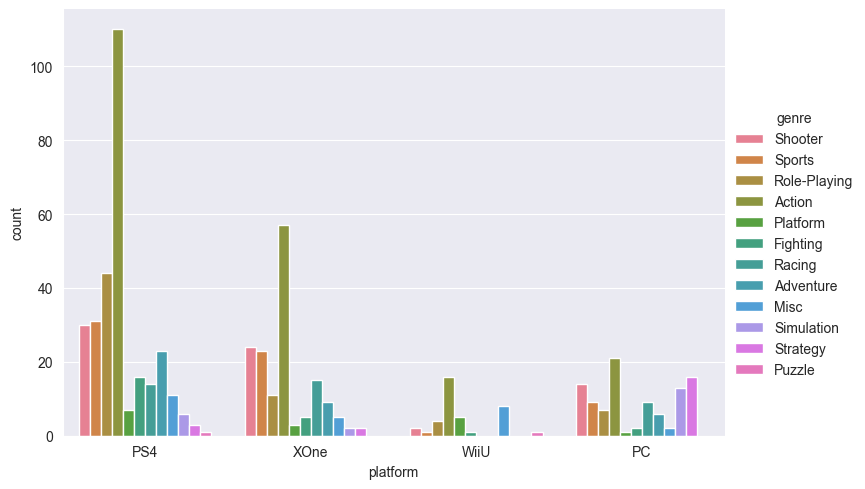

In [112]:
g = sns.catplot(
    data=df_selected,
    kind="count",
    x="platform",
    hue="genre",
    height=5,
    aspect=1.5,
)

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_7.pdf",
    dpi=300,
    bbox_inches="tight",
)

By now we already can analyse the popularity of the particular genre for each of the platforms, but it would be more convenient if we will sort it. Moreover, we can see that due to the imbalance of classes, classes with smaller number of data is not represents as the bigger classes. It's not a problem, because it bar pltos we can easily switch to the proportions

/var/folders/jq/byk1x73j6pngqgl6my8tgyhm0000gn/T/ipykernel_75360/2868977538.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  order = count_df.groupby("platform").apply(lambda x: x["genre"].tolist()).to_dict()


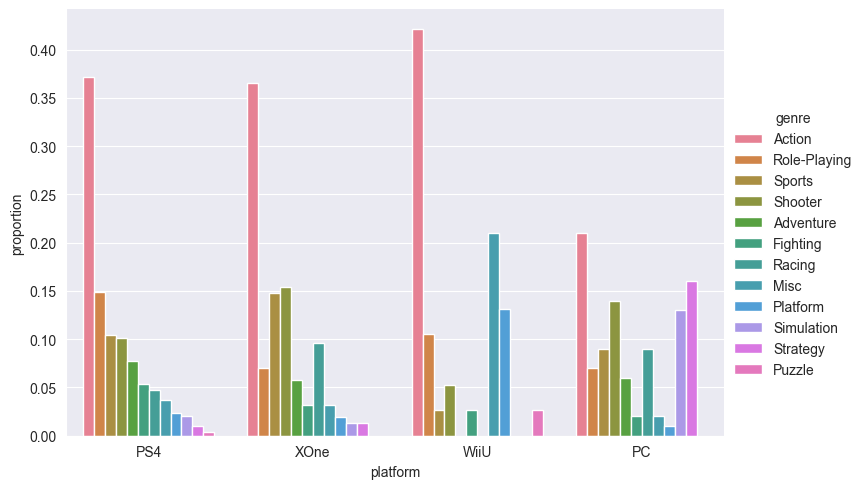

In [113]:
count_df = df_selected.groupby(["platform", "genre"]).size().reset_index(name="count")

# Calculate total count for each platform
platform_total = df_selected.groupby("platform")["genre"].count().reset_index(name="total")

# Merge the count dataframe with the total dataframe
count_df = count_df.merge(platform_total, on="platform")

# Calculate the proportion for each genre within each platform
count_df["proportion"] = count_df["count"] / count_df["total"]

# Sorting by proportions within each platform
count_df.sort_values(by=["platform", "proportion"], ascending=[True, False], inplace=True)

# Get the order of genres for each platform based on the proportions
order = count_df.groupby("platform").apply(lambda x: x["genre"].tolist()).to_dict()

# Create a categorical plot using seaborn, showing proportions
sns.catplot(
    data=count_df,
    kind="bar",
    x="platform",
    y="proportion",
    hue="genre",
    hue_order=order[df_selected["platform"].iloc[0]],  # Use calculated order
    height=5,
    aspect=1.5,
    order=df_selected["platform"].unique(),  # Preserve order of appearance in original data
)

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_8.pdf",
    dpi=300,
    bbox_inches="tight",
)

Also, with the bar plot its possible to analyse trends over time and keep the categories in the same time. 

/var/folders/jq/byk1x73j6pngqgl6my8tgyhm0000gn/T/ipykernel_75360/4254526681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["year_of_release"] = data["year_of_release"].dt.year


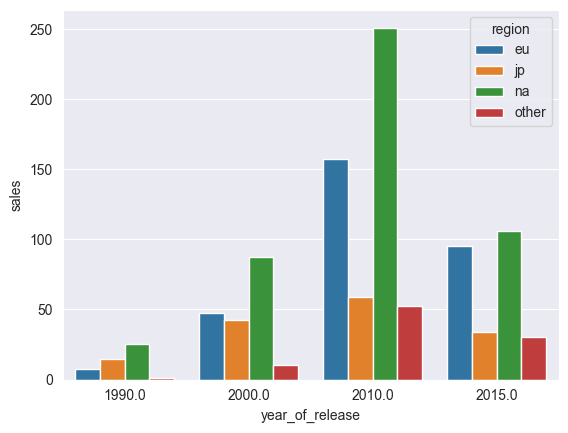

In [114]:
data = df[["year_of_release", "eu_sales", "jp_sales", "na_sales", "other_sales"]]
data["year_of_release"] = data["year_of_release"].dt.year
data = data[data.year_of_release.isin([1990.0, 2000.0, 2010.0, 2015.0])]

data = data.melt(id_vars="year_of_release", var_name="region", value_name="sales")

data["region"] = data["region"].str.replace("_sales", "")
data = data.groupby(["year_of_release", "region"])["sales"].sum().reset_index()

plot = sns.barplot(x="year_of_release", y="sales", hue="region", data=data)

plt.savefig(
    figures_path / "step_by_step_tutorial" / "step_9.pdf",
    dpi=300,
    bbox_inches="tight",
)